<a href="https://colab.research.google.com/github/oughtinc/ergo/blob/master/notebooks/basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [0]:
!pip install --quiet poetry  # Fixes https://github.com/python-poetry/poetry/issues/532
!pip install --quiet git+https://github.com/oughtinc/ergo.git

     |████████████████████████████████| 225kB 1.4MB/s 
     |████████████████████████████████| 112kB 46.2MB/s 
     |████████████████████████████████| 92kB 8.3MB/s 
     |████████████████████████████████| 61kB 5.7MB/s 
     |████████████████████████████████| 61kB 5.6MB/s 
     |████████████████████████████████| 2.7MB 57.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 153kB 1.4MB/s 
     |████████████████████████████████| 501kB 37.3MB/s 
     |████████████████████████████████| 61kB 833kB/s 
     |████████████████████████████████| 29.3MB 1.3MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 491kB 58.9MB/s 
ERROR: chainer 6.5.0 has requirement typing-extensions<=3.6.6, but you'll have typing-extensions 3.7.4.2 which is incompatible.


In [0]:
%load_ext google.colab.data_table

In [0]:
import ergo

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Model

In [0]:
def model():
  x = ergo.lognormal_from_interval(1, 10, name="x")
  y = ergo.beta_from_hits(2, 10, name="y")
  z = x * y  
  ergo.tag(z, "z")

samples = ergo.run(model, num_samples=10000)

100%|██████████| 10000/10000 [00:04<00:00, 2001.05it/s]


# Analysis

Histogram:

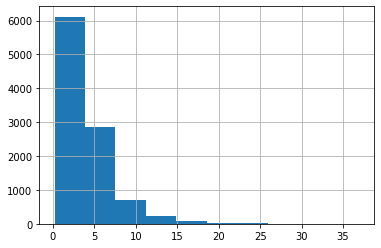

In [0]:
samples["x"].hist()

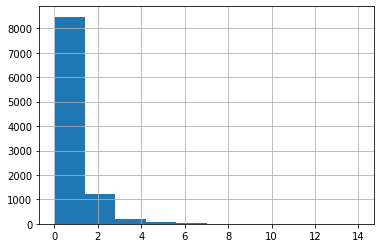

In [0]:
samples["z"].hist()

Summary stats:

In [0]:
samples.describe()

,x,y,z
count,10000.000000,10000.000000,10000.000000
mean,4.011841,0.200690,0.803957
std,3.096828,0.120059,0.872027
min,0.200796,0.001384,0.003447
25%,1.957841,0.108838,0.271216
50%,3.158993,0.181345,0.543474
75%,5.091129,0.272461,1.022287
max,36.911163,0.772178,14.026192
